In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functions import get_datasets
import glob
import os

In [130]:
i = 1
dataset = get_datasets()

In [131]:
input_file_original = f"../data/{dataset[i]['type']}/{dataset[i]['file']}_filtered.pkl"
input_file_svm = f"../data/{dataset[i]['type']}/{dataset[i]['file']}_SVM_filtered"
input_file_perc = f"../data/{dataset[i]['type']}/{dataset[i]['file']}_{dataset[i]['comparison']}_filtered.pkl"


In [132]:
svm_files = [filename for filename in os.listdir(f"../data/{dataset[i]['type']}") if filename.startswith(f"{dataset[i]['file']}_SVM_filtered_")]

In [133]:
# read original dataframes
df_original = pd.read_pickle(input_file_original)
dfs_svm = []
for svm_file in svm_files:
    dfs_svm.append(pd.read_pickle(f"../data/{dataset[i]['type']}/{svm_file}"))
if dataset[i]['comparison'] != None:
    df_perc = pd.read_pickle(input_file_perc)

In [134]:
for df in dfs_svm:
    display(df)

,Score,peplen,NuXL:isXL,NuXL:modds,NuXL:pl_modds,NuXL:mass_error_p,NuXL:tag_XLed,NuXL:tag_unshifted,NuXL:tag_shifted,missed_cleavages,...,train_label,Score_0,PSMId_0,FDR,q-val,FP,Count,class-specific_FDR,class-specific_q-val,cum_target_id
23545,1.000000,40,0,149.834488,0.000000,0.610040,0,24,0,0,...,1.0,149.834488,1,0.000000,0.000000,0,3,0.000000,0.000000,581.0
23703,1.000000,40,0,165.613602,0.000000,0.956545,0,25,0,0,...,1.0,165.613602,1,0.000000,0.000000,0,3,0.000000,0.000000,581.0
123298,1.000000,35,0,133.088974,0.000000,0.903224,0,22,0,0,...,1.0,133.088974,1,0.000000,0.000000,0,3,0.000000,0.000000,581.0
123737,1.000000,35,0,127.551163,0.000000,0.976817,0,22,0,0,...,1.0,127.551163,1,0.000000,0.000000,0,4,0.000000,0.000000,581.0
123892,1.000000,35,0,124.800026,0.000000,0.938146,0,22,0,0,...,1.0,124.800026,1,0.000000,0.000000,0,5,0.000000,0.000000,581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0.000816,50,1,1.791287,2.034003,0.505010,0,1,1,1,...,0.0,3.825290,1,0.693483,0.693422,7050,19190,0.367379,0.367354,12143.0
144060,0.000786,53,1,1.730056,1.848642,0.999574,0,1,1,2,...,0.0,3.578698,2,0.693538,0.693422,7051,19191,0.367412,0.367354,12143.0
76273,0.000785,70,1,2.380594,2.130136,0.161342,0,1,1,2,...,0.0,4.510730,1,0.693500,0.693422,7051,19192,0.367393,0.367354,12143.0
991,0.000774,48,1,1.597412,2.373015,0.996403,0,1,0,2,...,0.0,3.970426,2,0.693461,0.693422,7051,19193,0.367374,0.367354,12143.0


,Score,peplen,NuXL:isXL,NuXL:modds,NuXL:pl_modds,NuXL:mass_error_p,NuXL:tag_XLed,NuXL:tag_unshifted,NuXL:tag_shifted,missed_cleavages,...,PSMId_0,Score_1,PSMId_1,FDR,q-val,FP,Count,class-specific_FDR,class-specific_q-val,cum_target_id
23703,1.000000,40,0,165.613602,0.000000,0.956545,0,25,0,0,...,1,1.000000,1,0.000000,0.000000,0,1,0.000000,0.000000,346.0
21246,1.000000,32,0,113.009933,0.000000,0.999879,0,26,0,2,...,1,1.000000,1,0.000000,0.000000,0,2,0.000000,0.000000,346.0
111136,1.000000,19,0,115.306206,0.000000,0.963964,0,18,0,1,...,1,1.000000,1,0.000000,0.000000,0,3,0.000000,0.000000,346.0
110748,1.000000,19,0,115.306206,0.000000,0.946144,0,18,0,1,...,1,1.000000,1,0.000000,0.000000,0,4,0.000000,0.000000,346.0
123298,1.000000,35,0,133.088974,0.000000,0.903224,0,22,0,0,...,1,1.000000,1,0.000000,0.000000,0,5,0.000000,0.000000,346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21368,0.000701,65,1,2.275487,2.607416,0.517225,0,1,0,2,...,2,0.000836,3,0.697471,0.697471,7220,19483,0.370579,0.370579,12263.0
105936,0.000684,71,1,2.354291,3.606708,0.629840,0,1,1,1,...,2,0.000952,1,0.697527,0.697505,7221,19484,0.370612,0.370606,12265.0
77046,0.000635,68,1,3.550305,3.708231,0.290619,0,1,2,2,...,1,0.001372,1,0.697583,0.697505,7222,19485,0.370644,0.370606,12265.0
22321,0.000539,68,1,2.459365,2.185951,0.188484,2,1,1,1,...,1,0.000845,1,0.697544,0.697505,7222,19486,0.370625,0.370606,12265.0


,Score,peplen,NuXL:isXL,NuXL:modds,NuXL:pl_modds,NuXL:mass_error_p,NuXL:tag_XLed,NuXL:tag_unshifted,NuXL:tag_shifted,missed_cleavages,...,PSMId_1,Score_2,PSMId_2,FDR,q-val,FP,Count,class-specific_FDR,class-specific_q-val,cum_target_id
23703,1.000000,40,0,165.613602,0.000000,0.956545,0,25,0,0,...,1,1.000000,1,0.000000,0.000000,0,1,0.000000,0.000000,365.0
111136,1.000000,19,0,115.306206,0.000000,0.963964,0,18,0,1,...,1,1.000000,1,0.000000,0.000000,0,2,0.000000,0.000000,365.0
21246,1.000000,32,0,113.009933,0.000000,0.999879,0,26,0,2,...,1,1.000000,1,0.000000,0.000000,0,3,0.000000,0.000000,365.0
13445,1.000000,16,0,94.991272,0.000000,0.997145,0,15,0,0,...,1,1.000000,1,0.000000,0.000000,0,4,0.000000,0.000000,365.0
110748,1.000000,19,0,115.306206,0.000000,0.946144,0,18,0,1,...,1,1.000000,1,0.000000,0.000000,0,5,0.000000,0.000000,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26152,0.000747,61,1,3.831784,2.948348,0.223933,0,1,1,1,...,2,0.000681,2,0.696139,0.696100,7408,19852,0.373161,0.373143,12445.0
76478,0.000698,59,1,3.910884,3.060032,0.254084,0,2,1,2,...,1,0.000750,1,0.696100,0.696100,7408,19853,0.373143,0.373143,12445.0
22322,0.000649,63,1,1.499231,2.854695,0.281038,0,1,1,1,...,2,0.000528,2,0.696156,0.696156,7409,19854,0.373174,0.373174,12445.0
77046,0.000563,68,1,3.550305,3.708231,0.290619,0,1,2,2,...,1,0.000635,1,0.696212,0.696173,7410,19855,0.373206,0.373187,12446.0


,Score,peplen,NuXL:isXL,NuXL:modds,NuXL:pl_modds,NuXL:mass_error_p,NuXL:tag_XLed,NuXL:tag_unshifted,NuXL:tag_shifted,missed_cleavages,...,PSMId_2,Score_3,PSMId_3,FDR,q-val,FP,Count,class-specific_FDR,class-specific_q-val,cum_target_id
23703,1.000000,40,0,165.613602,0.000000,0.956545,0,25,0,0,...,1,1.000000,1,0.000000,0.000000,0,1,0.000000,0.000000,350.0
13445,1.000000,16,0,94.991272,0.000000,0.997145,0,15,0,0,...,1,1.000000,1,0.000000,0.000000,0,2,0.000000,0.000000,350.0
78309,0.999999,18,0,72.651207,0.000000,0.971659,0,17,0,0,...,1,1.000000,1,0.000000,0.000000,0,3,0.000000,0.000000,350.0
116692,0.999999,22,0,75.065994,0.000000,0.984045,0,19,0,0,...,1,1.000000,1,0.000000,0.000000,0,4,0.000000,0.000000,350.0
111136,0.999999,19,0,115.306206,0.000000,0.963964,0,18,0,1,...,1,1.000000,1,0.000000,0.000000,0,5,0.000000,0.000000,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22322,0.001069,63,1,1.499231,2.854695,0.281038,0,1,1,1,...,2,0.000649,1,0.698065,0.698065,7520,20012,0.375775,0.375775,12492.0
930,0.000878,34,1,2.404170,8.096212,0.130100,0,1,1,2,...,1,0.000838,1,0.698233,0.698194,7521,20013,0.375806,0.375787,12493.0
76478,0.000856,59,1,3.910884,3.060032,0.254084,0,2,1,2,...,1,0.000698,1,0.698194,0.698194,7521,20014,0.375787,0.375787,12493.0
77046,0.000737,68,1,3.550305,3.708231,0.290619,0,1,2,2,...,1,0.000563,1,0.698306,0.698267,7522,20015,0.375818,0.375799,12494.0


,Score,peplen,NuXL:isXL,NuXL:modds,NuXL:pl_modds,NuXL:mass_error_p,NuXL:tag_XLed,NuXL:tag_unshifted,NuXL:tag_shifted,missed_cleavages,...,PSMId_3,Score_4,PSMId_4,FDR,q-val,FP,Count,class-specific_FDR,class-specific_q-val,cum_target_id
23703,1.000000,40,0,165.613602,0.000000,0.956545,0,25,0,0,...,1,1.000000,1,0.000000,0.000000,0,1,0.000000,0.000000,358.0
13445,1.000000,16,0,94.991272,0.000000,0.997145,0,15,0,0,...,1,1.000000,1,0.000000,0.000000,0,2,0.000000,0.000000,358.0
78309,0.999999,18,0,72.651207,0.000000,0.971659,0,17,0,0,...,1,0.999999,1,0.000000,0.000000,0,3,0.000000,0.000000,358.0
116692,0.999999,22,0,75.065994,0.000000,0.984045,0,19,0,0,...,1,0.999999,1,0.000000,0.000000,0,4,0.000000,0.000000,358.0
107333,0.999999,21,0,59.646034,0.000000,0.997908,0,19,0,0,...,1,0.999999,1,0.000000,0.000000,0,5,0.000000,0.000000,358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76861,0.001159,39,1,3.666276,4.223819,0.161340,0,2,1,2,...,1,0.001087,1,0.706201,0.706201,7692,20179,0.381188,0.381169,12488.0
76478,0.000967,59,1,3.910884,3.060032,0.254084,0,2,1,2,...,1,0.000856,1,0.706217,0.706217,7692,20180,0.381169,0.381169,12488.0
930,0.000949,34,1,2.404170,8.096212,0.130100,0,1,1,2,...,1,0.000878,1,0.706330,0.706330,7693,20181,0.381200,0.381200,12488.0
77046,0.000842,68,1,3.550305,3.708231,0.290619,0,1,2,2,...,1,0.000737,1,0.706443,0.706403,7694,20182,0.381231,0.381212,12489.0


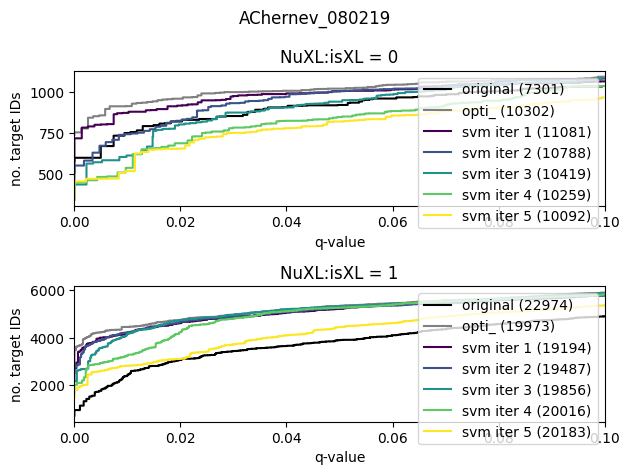

In [ ]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,5)))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})", color = "gray")
    for k, df_svm in enumerate(dfs_svm):
        axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"svm iter {k + 1} ({len(df_svm[df_svm[dataset[i]['group']]== j])})")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    if j == max(np.unique(df_original[dataset[i]['group']])) - 1:
    axs[j].legend()
fig.suptitle(dataset[i]['name'])
fig.tight_layout()
plt.savefig(f"../results/{dataset[i]['type']}/{dataset[i]['name']}.png")
plt.show()

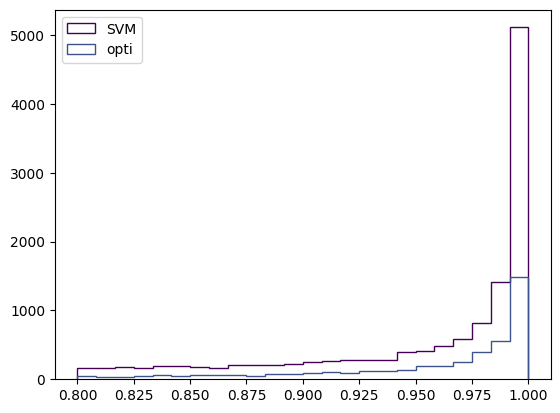

In [136]:
bins = np.linspace(0.8,1,25)
plt.hist(df_svm.loc[df_svm[df_svm['Score'] > 0.8].index, 'Score'], label = 'SVM', histtype='step', bins=bins)
plt.hist(df_perc.loc[df_perc[df_perc['Score'] > 0.8].index, 'Score'], label='opti', histtype='step', bins = bins)
plt.legend()
plt.show()

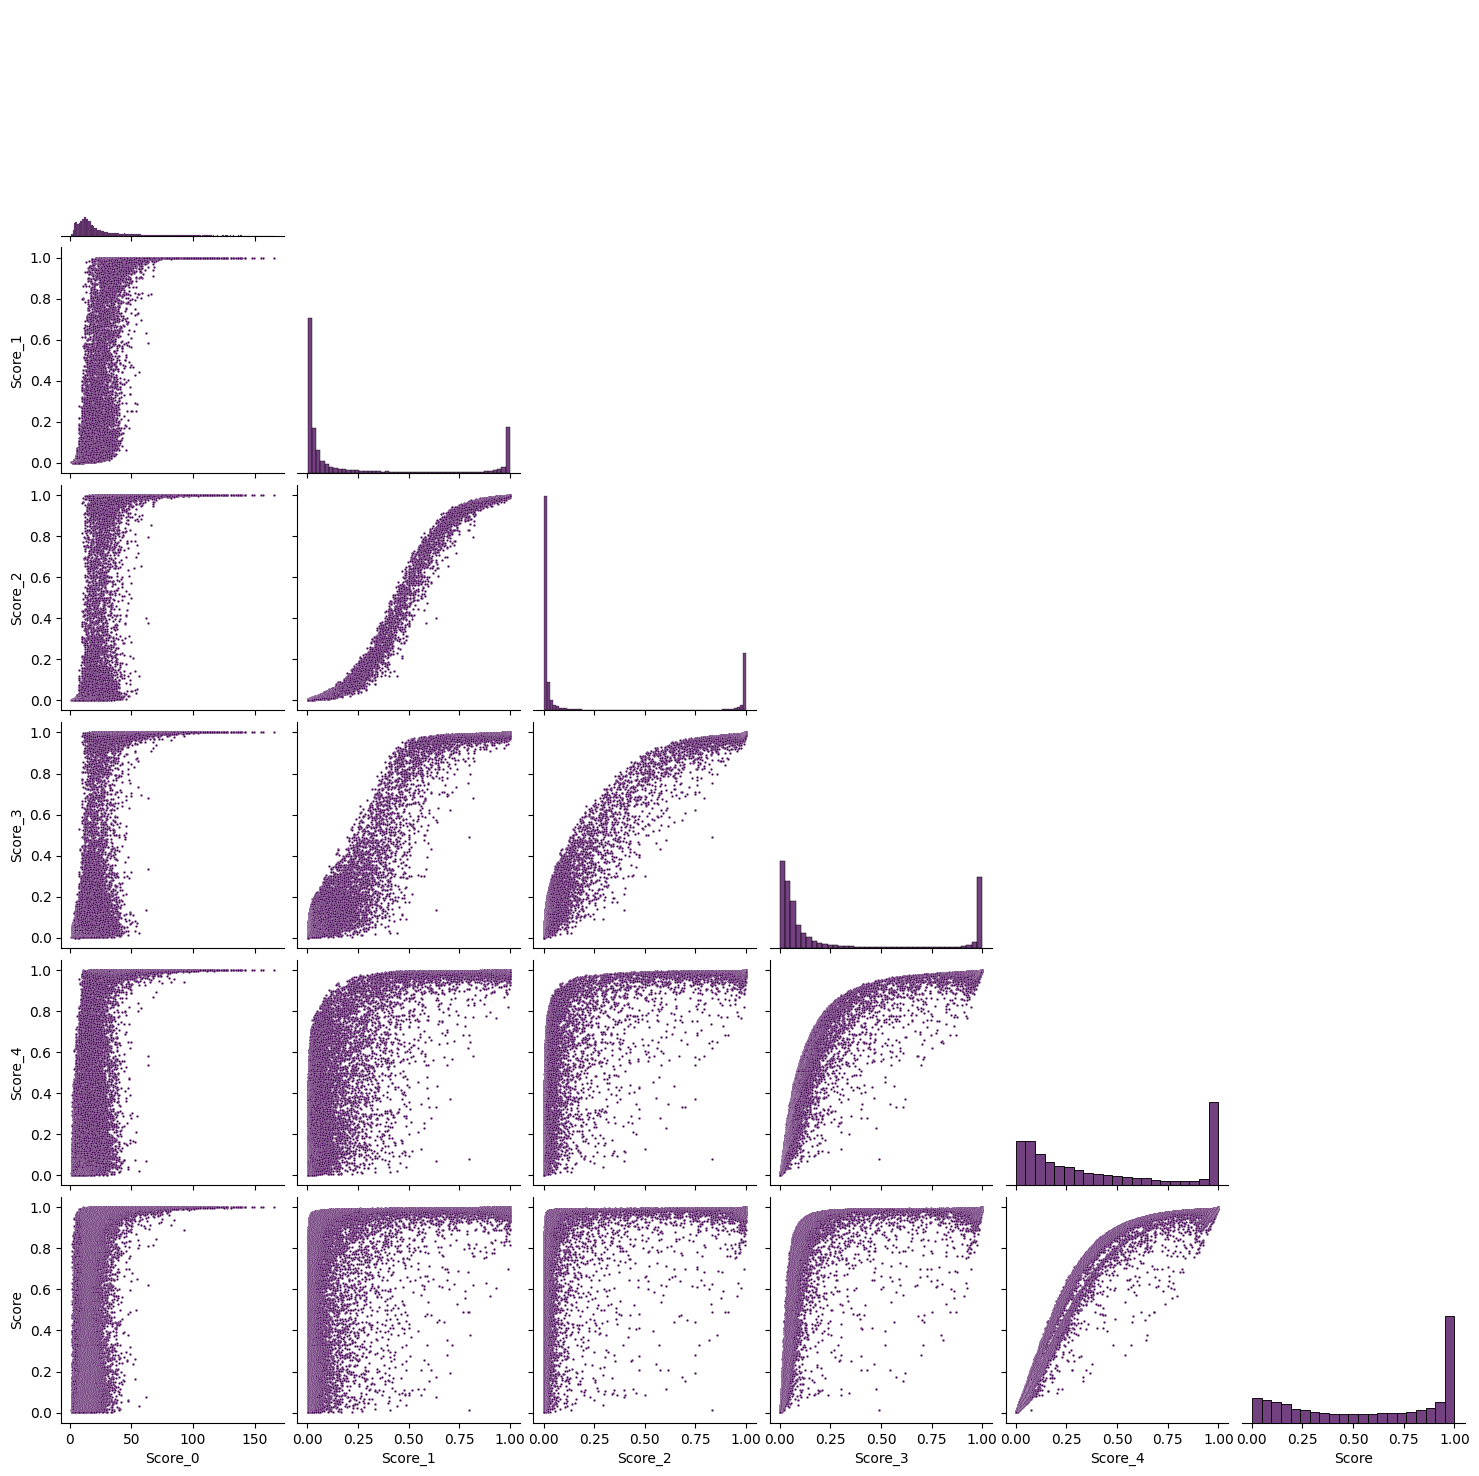

In [137]:
import seaborn as sns
sns.pairplot(df_svm.loc[:,['Score_0', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score']], plot_kws={"s": 3}, corner=True)